# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [98]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [99]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [100]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [101]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [102]:
df_data.describe()
columny = df_data.columns

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [103]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [104]:
has_nans = df_data.isna().any(axis=0)
print(df_data.columns[has_nans])
# Replace the NaN values with 0
df_data.fillna(0, inplace=True)
has_nans = df_data.isna().any(axis=0)
print(df_data.columns[has_nans])


Index(['AGEMBTH', 'HHINC97', 'POVRAT97', 'PRMONM', 'PRMONF', 'PRMSTYUN',
       'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN',
       'PRFSTYAE', 'SFR', 'SMR', 'JOBS'],
      dtype='object')
Index([], dtype='object')


In [105]:
import numpy as np
# check for duplicates column-wise
has_duplicates = df_data.duplicated(keep=False).any(axis=0)

# convert df_data.columns to a NumPy array before indexing
columns_arr = np.array(df_data.columns)

# print the column names with duplicates
print(columns_arr[has_duplicates])

[['ID' 'EARNINGS' 'S' 'EXP' 'FEMALE' 'MALE' 'BYEAR' 'AGE' 'AGEMBTH'
  'HHINC97' 'POVRAT97' 'HHBMBF' 'HHBMOF' 'HHOMBF' 'HHBMONLY' 'HHBFONLY'
  'HHOTHER' 'MSA97NO' 'MSA97NCC' 'MSA97CC' 'MSA97NK' 'ETHBLACK' 'ETHHISP'
  'ETHWHITE' 'EDUCPROF' 'EDUCPHD' 'EDUCMAST' 'EDUCBA' 'EDUCAA' 'EDUCHSD'
  'EDUCGED' 'EDUCDO' 'PRMONM' 'PRMONF' 'PRMSTYUN' 'PRMSTYPE' 'PRMSTYAN'
  'PRMSTYAE' 'PRFSTYUN' 'PRFSTYPE' 'PRFSTYAN' 'PRFSTYAE' 'SINGLE'
  'MARRIED' 'COHABIT' 'OTHSING' 'FAITHN' 'FAITHP' 'FAITHC' 'FAITHJ'
  'FAITHO' 'FAITHM' 'ASVABAR' 'ASVABWK' 'ASVABPC' 'ASVABMK' 'ASVABNO'
  'ASVABCS' 'ASVABC' 'ASVABC4' 'VERBAL' 'ASVABMV' 'HEIGHT' 'WEIGHT04'
  'WEIGHT11' 'SF' 'SM' 'SFR' 'SMR' 'SIBLINGS' 'REG97NE' 'REG97NC'
  'REG97S' 'REG97W' 'RS97RURL' 'RS97URBN' 'RS97UNKN' 'JOBS' 'HOURS'
  'TENURE' 'CATGOV' 'CATPRI' 'CATNPO' 'CATMIS' 'CATSE' 'COLLBARG' 'URBAN'
  'REGNE' 'REGNC' 'REGW' 'REGS' 'MSA11NO' 'MSA11NCC' 'MSA11CC' 'MSA11NK'
  'MSA11NIC']]


In [106]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,0.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = ['EARNINGS', 'AGE', 'S', 'EXP', 'HHINC97', 'AGEMBTH','POVRAT97']
df_selected_columns = df_data[columns_to_normalize]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_selected_columns[columns_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
df_normalized = pd.concat([df_data.drop(columns=columns_to_normalize), normalized_df], axis=1)
df_data = df_normalized

In [134]:
df_data.head()

,ID,FEMALE,MALE,BYEAR,HHBMBF,HHBMOF,HHOMBF,HHBMONLY,HHBFONLY,HHOTHER,...,MSA11CC,MSA11NK,MSA11NIC,EARNINGS,AGE,S,EXP,HHINC97,AGEMBTH,POVRAT97
0,4275,0,1,1984,1,0,0,0,0,0,...,1,0,0,0.13,0.00,0.43,0.66,0.26,0.53,0.25
1,4328,0,1,1982,1,0,0,0,0,0,...,0,0,0,0.13,0.50,0.79,0.39,0.02,0.71,0.02
2,8763,0,1,1981,0,0,0,1,0,0,...,1,0,0,0.28,0.75,0.57,0.67,0.36,0.51,0.34
3,8879,0,1,1983,1,0,0,0,0,0,...,0,0,0,0.11,0.25,0.86,0.10,0.00,0.67,0.00
4,1994,0,1,1984,1,0,0,0,0,0,...,1,0,0,0.26,0.00,0.64,0.20,0.18,0.51,0.17


## Visualise the Features

In [135]:
corr_matrix = df_data.corrwith(df_data['EARNINGS'])
corr_matrix = corr_matrix.sort_values(ascending=False)
print(corr_matrix[:20])

EARNINGS   1.00
S          0.28
ASVABMK    0.27
ASVABAR    0.27
ASVABC4    0.25
ASVABC     0.25
ASVABMV    0.25
ASVABNO    0.19
VERBAL     0.19
ASVABPC    0.18
EDUCPROF   0.17
ASVABWK    0.17
SF         0.16
HHINC97    0.16
EDUCBA     0.16
TENURE     0.15
EDUCMAST   0.15
MSA97NCC   0.15
POVRAT97   0.14
HEIGHT     0.14
dtype: float64


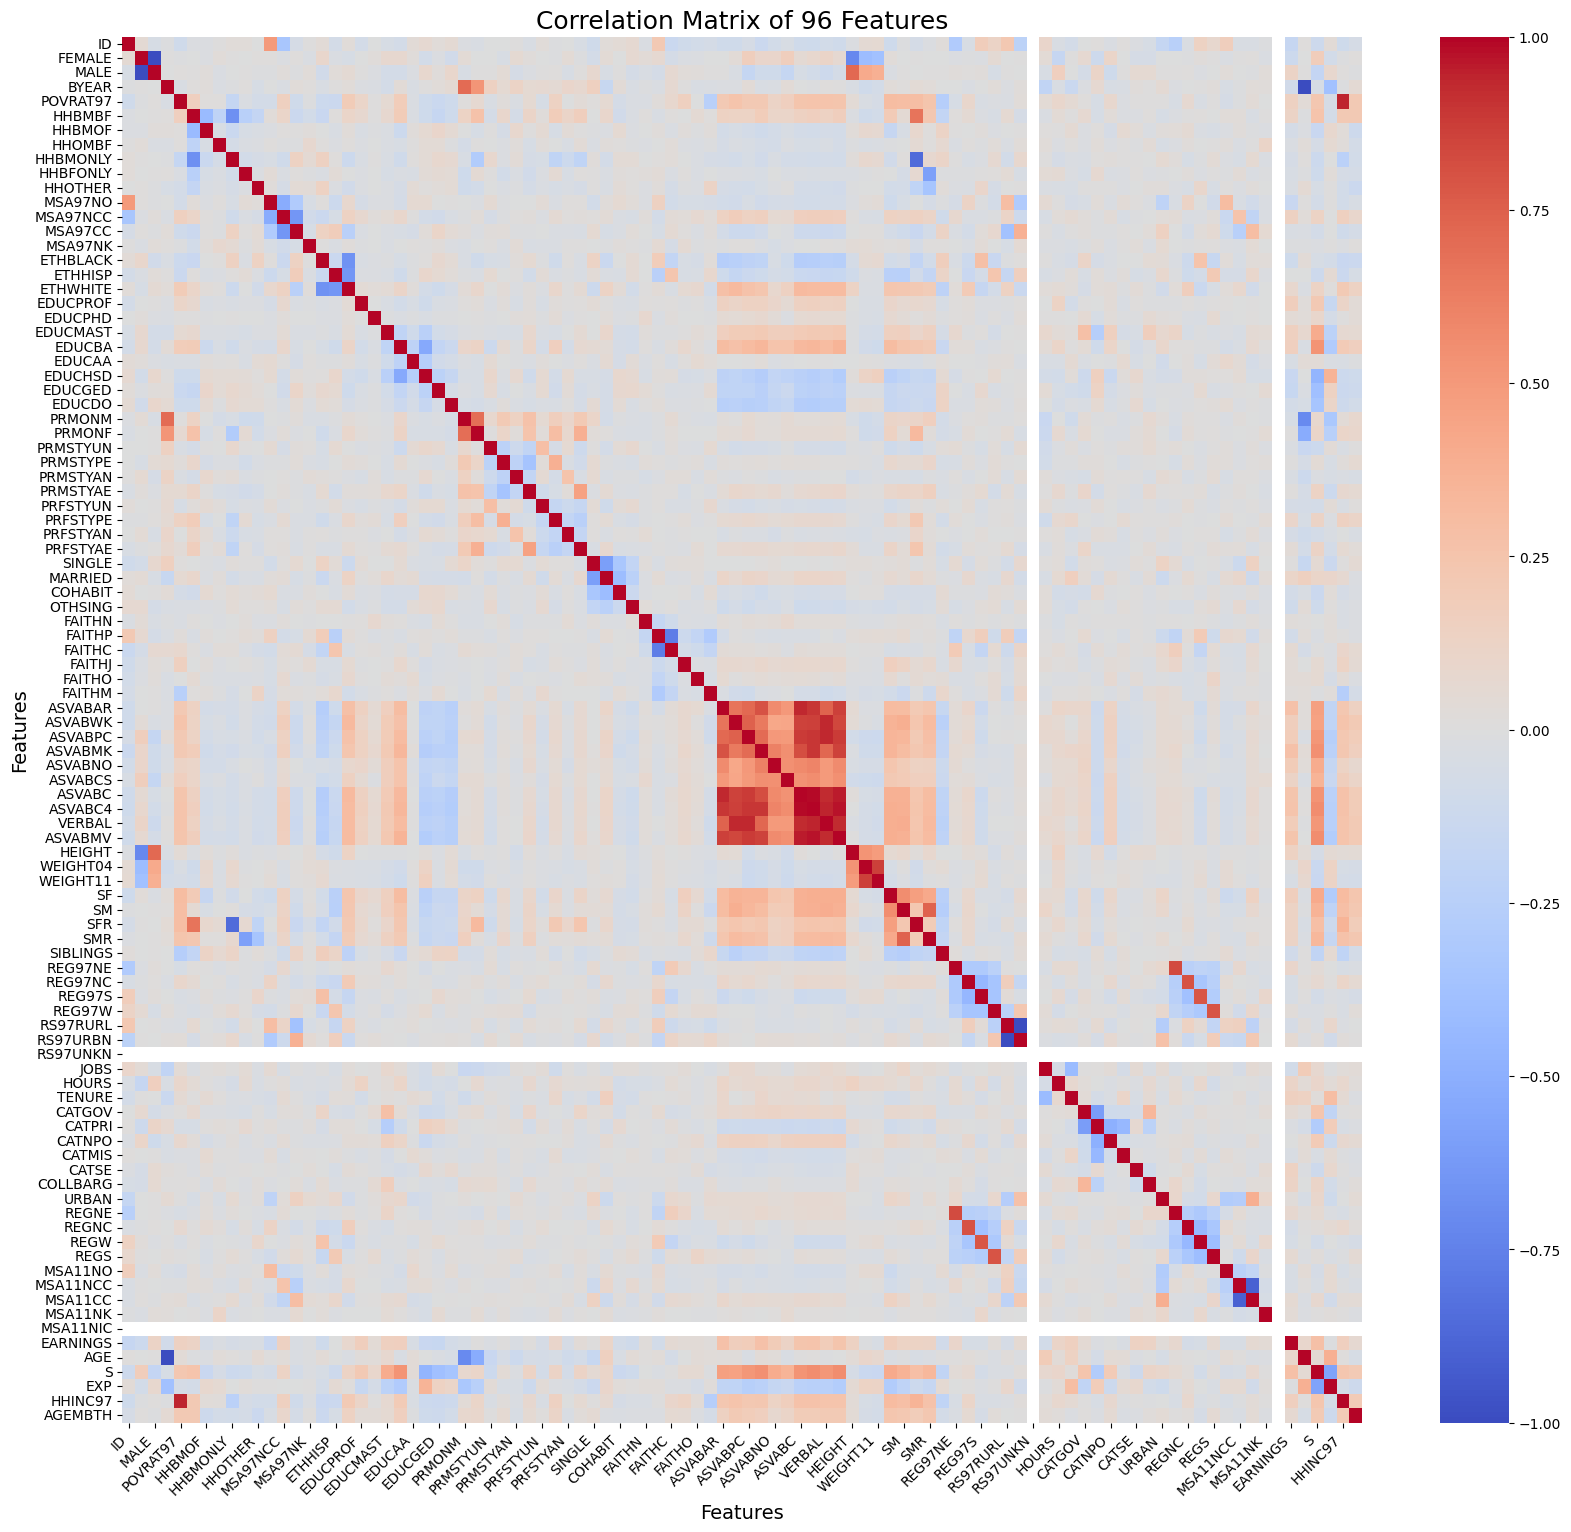

In [110]:
# Create a correlation matrix
corr_matrix = df_data.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(20, 18))

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax)

# Set the title and axis labels
ax.set_title('Correlation Matrix of 96 Features', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

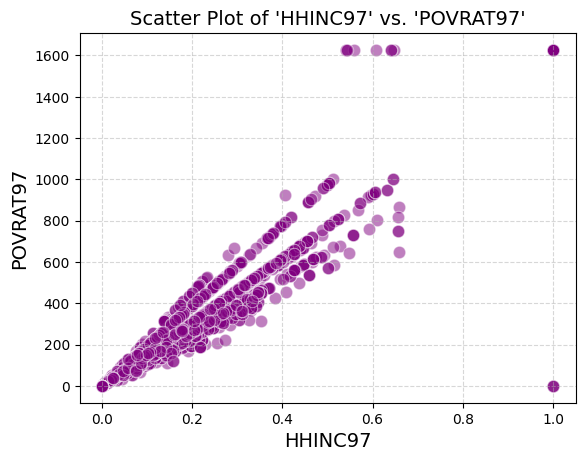

In [111]:
top_corr_features = corr_matrix.nlargest(2, 'HHINC97')['HHINC97'].index

# create a scatter plot of the two most correlated features with target
sns.scatterplot(x=top_corr_features[0], y=top_corr_features[1], data=df_data, color='purple', alpha=0.5, s=80)

# set the title and axis labels
plt.title(f"Scatter Plot of '{top_corr_features[0]}' vs. '{top_corr_features[1]}'", fontsize=14)
plt.xlabel(top_corr_features[0], fontsize=14)
plt.ylabel(top_corr_features[1], fontsize=14)
# set the title and axis labels
# add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

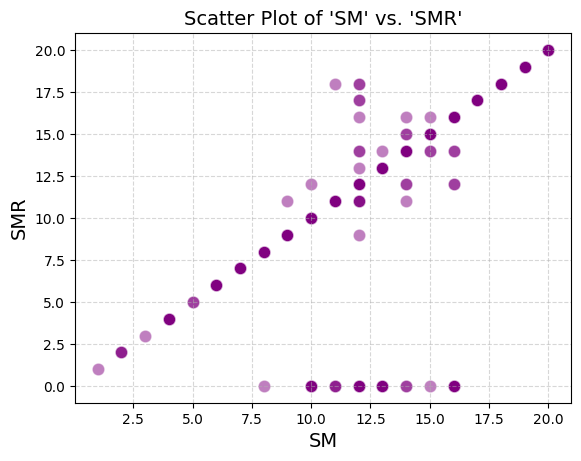

In [112]:
top_corr_features = corr_matrix.nlargest(2, 'SM')['SM'].index

# create a scatter plot of the two most correlated features with target
sns.scatterplot(x=top_corr_features[0], y=top_corr_features[1], data=df_data, color='purple', alpha=0.5, s=80)

# set the title and axis labels
plt.title(f"Scatter Plot of '{top_corr_features[0]}' vs. '{top_corr_features[1]}'", fontsize=14)
plt.xlabel(top_corr_features[0], fontsize=14)
plt.ylabel(top_corr_features[1], fontsize=14)
# set the title and axis labels
# add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


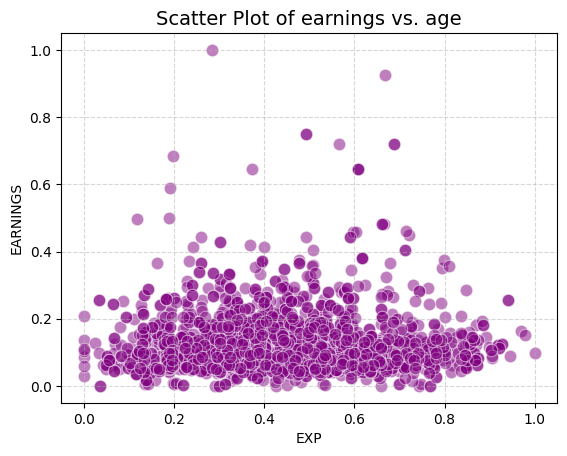

In [113]:

# create a scatter plot of the two most correlated features with target
sns.scatterplot(x=df_data['EXP'], y=df_data['EARNINGS'], data=df_data, color='purple', alpha=0.5, s=80)

# set the title and axis labels
plt.title(f"Scatter Plot of earnings vs. age", fontsize=14)
#plt.xlabel('AGE', fontsize=14)
#plt.ylabel(df_data['EARNINGS'], fontsize=14)
# set the title and axis labels
# add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [114]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df_data, test_size=0.2, random_state=42)

# Verify the size of the resulting sets
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 1600
Testing set size: 400


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Use only the "years_of_schooling" variable as input
X_train = train_data[['S']]

# Use the "earnings" variable as output
y_train = train_data['EARNINGS']

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to predict earnings on the training data
y_pred_train = model.predict(X_train)

# Calculate the R-squared value on the training data
r2_train = r2_score(y_train, y_pred_train)

print(f"R-squared on the training data: {r2_train:.3f}")


R-squared on the training data: 0.068


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [116]:
# Use only the "years_of_schooling" variable as input for the testing data
X_test = test_data[['S']]

# Use the "earnings" variable as output for the testing data
y_test = test_data['EARNINGS']

# Use the trained model to predict earnings on the testing data
y_pred_test = model.predict(X_test)

# Calculate the R-squared value on the testing data
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared on the testing data: {r2_test:.3f}")


R-squared on the testing data: 0.099


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

<AxesSubplot: xlabel='EARNINGS', ylabel='Count'>

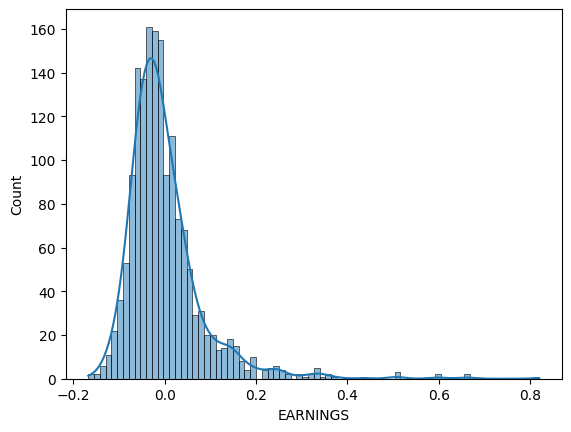

In [117]:
# Calculate the residuals on the training data
residuals = y_train - y_pred_train

# Plot a histogram of the residuals
sns.histplot(residuals, kde=True)

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [118]:
# Define the predictor variables and target variable
X = train_data[["S", "EXP"]]
# Use the "earnings" variable as output for the testing data
y = train_data['EARNINGS']

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

# Predict the target variable for the test data
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

print("R-squared:", r2)

R-squared: 0.09980231795612249


### Evaluate the Coefficients of the Model

In [119]:
# Get the coefficients and the intercept of the model
coef = model.coef_
intercept = model.intercept_

# Print the coefficients and the intercept of the model
print("Coefficients:", coef)
print("Intercept:", intercept)

Coefficients: [0.17318611 0.09936797]
Intercept: -0.02384930018602155


In [120]:
# Use only the "years_of_schooling" variable as input for the testing data
X_test = test_data[["S", "EXP"]]

# Use the "earnings" variable as output for the testing data
y_test = test_data['EARNINGS']

# Use the trained model to predict earnings on the testing data
y_pred_test = model.predict(X_test)

# Calculate the R-squared value on the testing data
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared on the testing data: {r2_test:.3f}")


R-squared on the testing data: 0.131


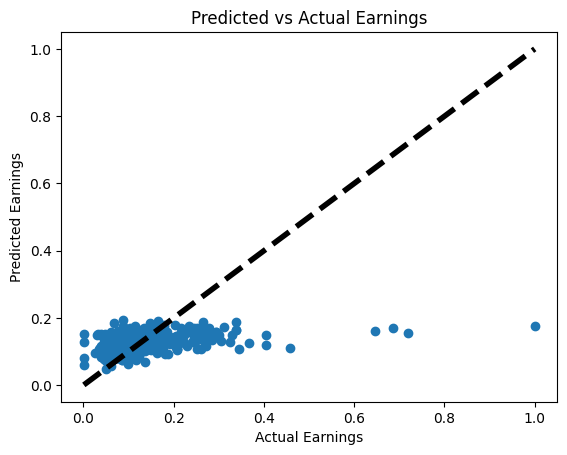

In [121]:
import matplotlib.pyplot as plt

# create a scatter plot of the predicted vs actual earnings
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Earnings')
plt.ylabel('Predicted Earnings')
plt.title('Predicted vs Actual Earnings')
plt.show()


### Analyse the Estimated Values & Regression Residuals

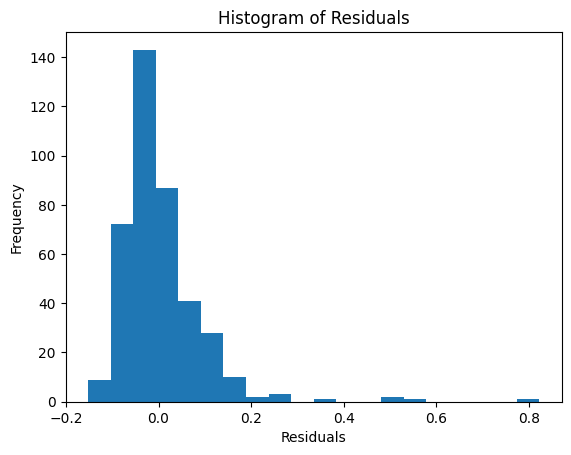

In [122]:
residuals = y_test - y_pred_test
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Mean Absolute Error (MAE): 0.058290666934872365
Mean Squared Error (MSE): 0.008556547263688681
Root Mean Squared Error (RMSE): 0.09250160681679363


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [124]:
# define the input data for the prediction
x_pred = np.array([[16, 5]])

# make the prediction
y_pred = model.predict(x_pred)

# print the predicted earnings
print("Predicted earnings in 2011 for someone with 16 years of schooling and 5 years of work experience:", y_pred[0])

Predicted earnings in 2011 for someone with 16 years of schooling and 5 years of work experience: 3.2439682978937836


c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [125]:
# Define the predictor variables and target variable
X = train_data[["S", "EXP", "ASVABMK", "ASVABAR","ASVABC4", "ASVABC", "ASVABMV"]]
# Use the "earnings" variable as output for the testing data
y = train_data['EARNINGS']

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

# Predict the target variable for the test data
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

print("R-squared:", r2)


R-squared: 0.13011380447994247


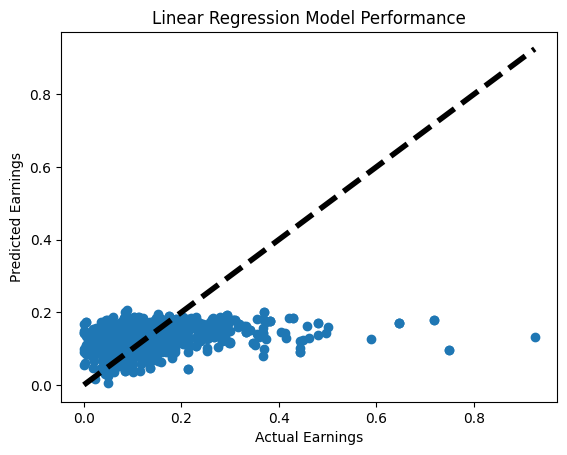

In [126]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Earnings')
plt.ylabel('Predicted Earnings')
plt.title('Linear Regression Model Performance')
plt.show()


## Random Forest

In [127]:
# Import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the predictor variables and target variable
X = train_data[["S", "EXP"]]

# Use the "earnings" variable as output for the testing data
y = train_data['EARNINGS']

# Create a RandomForestRegressor object with 100 trees
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model.fit(X, y)

# Predict the target variable for the test data
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

print("R-squared:", r2)


R-squared: 0.8205428301550629


In [128]:
# define the input data for the prediction
x_pred = np.array([[16, 5]])

# make the prediction
y_pred = model.predict(x_pred)

# print the predicted earnings
print("Predicted earnings in 2011 for someone with 16 years of schooling and 5 years of work experience:", y_pred[0])

Predicted earnings in 2011 for someone with 16 years of schooling and 5 years of work experience: 0.14027873277815986


c:\Users\mbajd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [129]:
# Import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the predictor variables and target variable
X = train_data[["S", "EXP", "ASVABMK", "ASVABAR","ASVABC4", "ASVABC", "ASVABMV"]]

# Use the "earnings" variable as output for the testing data
y = train_data['EARNINGS']

# Create a RandomForestRegressor object with 100 trees
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model.fit(X, y)

# Predict the target variable for the test data
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

print("R-squared:", r2)


R-squared: 0.9210567565233871


In [130]:
# Use only the "years_of_schooling" variable as input for the testing data
X_test = train_data[["S", "EXP", "ASVABMK", "ASVABAR","ASVABC4", "ASVABC", "ASVABMV"]]

# Use the "earnings" variable as output for the testing data
y_test = train_data['EARNINGS']

# Use the trained model to predict earnings on the testing data
y_pred_test = model.predict(X_test)

# Calculate the R-squared value on the testing data
r2_test = r2_score(y_test, y_pred_test)

print(f"R-squared on the testing data: {r2_test:.3f}")


R-squared on the testing data: 0.921


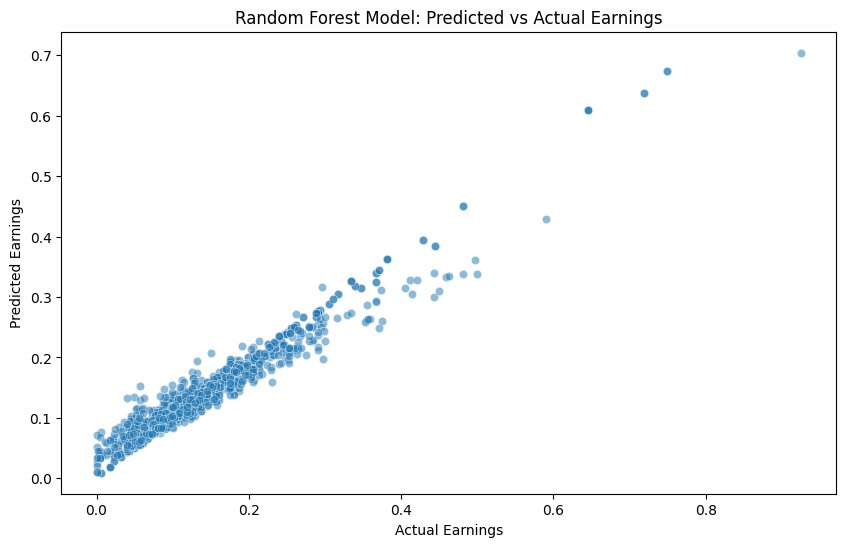

In [131]:
# Create a scatter plot of predicted versus actual earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.xlabel('Actual Earnings')
plt.ylabel('Predicted Earnings')
plt.title('Random Forest Model: Predicted vs Actual Earnings')
plt.show()

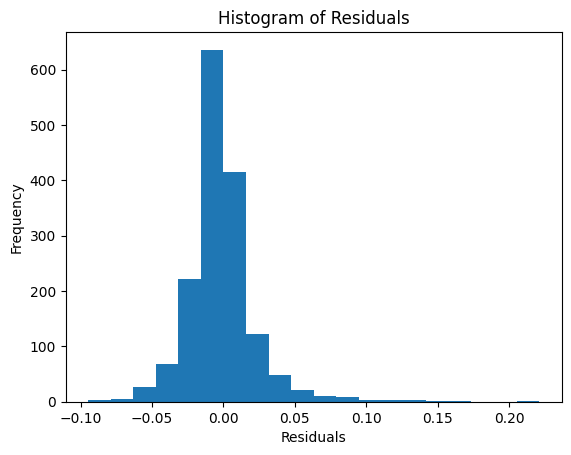

In [132]:
residuals = y_test - y_pred_test
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
